<a href="https://colab.research.google.com/github/ishaPo/AI_ML_Projects/blob/main/Deep_Learning_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What are CNNs?**


Here's a simplified overview of how they work:

1. **Input Layer:** The network starts with an input layer that takes the raw data, which in the case of image recognition, would be pixel values of an image.

2. **Convolutional Layers:** CNNs use convolutional layers to automatically learn features from the input. These layers consist of small filters (also known as kernels) that slide or "convolve" across the input image. At each position, the filter performs a mathematical operation (convolution) to detect specific features, like edges or textures.

3. **Activation Function:** After each convolution operation, an activation function like ReLU (Rectified Linear Unit) is applied to introduce non-linearity. This helps the network learn complex patterns.

4. **Pooling Layers:** Pooling layers (often max-pooling or average-pooling) reduce the spatial dimensions of the data, making it computationally efficient while retaining important information. Pooling essentially down-samples the feature maps generated by the convolutional layers.

5. **Fully Connected Layers:** After several convolutional and pooling layers, the network typically has one or more fully connected layers. These layers connect every neuron from the previous layer to every neuron in the current layer, allowing the network to make high-level decisions based on the features learned.

6. **Output Layer:** The final layer of the CNN produces the network's output, which could be the classification of an object in the case of image recognition or any other desired result.

7. **Loss Function:** A loss function measures how well the network's output matches the desired output (e.g., the correct class label). The goal during training is to minimize this loss.

8. **Backpropagation and Optimization:** The network adjusts its internal parameters (weights and biases) using backpropagation and optimization algorithms (like Gradient Descent) to minimize the loss function. This process continues for multiple epochs until the network learns to make accurate predictions.

CNNs excel at hierarchical feature extraction, which means they start by detecting simple features like edges and gradually build up to recognize complex patterns like faces or objects in images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!unzip '/content/Brain Tumor Data Set.zip'
## Dataset from here -> https://www.kaggle.com/code/boneacrabonjac/brain-tumor-classification-with-simple-cnn/input

Archive:  /content/Brain Tumor Data Set.zip
   creating: Brain Tumor Data Set/Brain Tumor/
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1005).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1006).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1007).jpg  

In [11]:
# number of images in each type Healthy and Brain Tumor
ROOT_DIR = '/content/Brain Tumor Data Set'

number_of_imgs = {}

for dir in os.listdir(ROOT_DIR):
  number_of_imgs[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

In [5]:
number_of_imgs

{'Healthy': 2087, 'Brain Tumor': 2513}

#Split the Data



1.   70% for training data
2.   15% for Validation data
3.   15% for testing



In [6]:
def data_folder_creator(path,split):
  # training folder
  if not os.path.exists('./'+path):
    os.mkdir('./'+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs('./'+path+'/'+dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size = (math.floor(split*number_of_imgs[dir])-5),
                                          replace=False):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join('./'+path,dir)
        shutil.copy(O,D)
        os.remove(O)

  else:
    print(f'{path} folder exists')

In [7]:
data_folder_creator("train",0.71) # for training data

In [8]:
data_folder_creator("val",0.15) # validation data

In [12]:
data_folder_creator("test",0.15) # test data

# Model Building

In [13]:
# different layers
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, MaxPooling2D, GlobalAvgPool2D

# model
from keras.models import Sequential

# for preprocessing images
from keras.preprocessing.image import ImageDataGenerator

import keras

In [ ]:
# CNN Model

# model initializatoin
model = Sequential()

# add layers
# Convolution layer 1
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (224, 224, 3) ))

# Convolution layer 2
model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = 'relu'))

# Max Pool layer to remove overfitting
model.add(MaxPool2D(pool_size = (2,2) ))

# Convolution layer 4
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

# Max Pool layer to remove overfitting
model.add(MaxPool2D(pool_size = (2,2) ))

# Convolution layer 5
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))

# Max Pool layer to remove overfitting
model.add(MaxPool2D(pool_size = (2,2) ))

# retain 25% of data
model.add(Dropout(rate = 0.25))

# Flatten
model.add(Flatten())

# Dense Layer
model.add(Dense(units = 64, activation = 'relu'))

# Dropout Layer retain 25% of data
model.add(Dropout(rate = 0.25))

# Dense Layer -> here since we have put 1, the output will range from 0 to 1 and
# whichever value it is closer to, it will choose that
model.add(Dense(units = 1, activation = 'sigmoid'))

# see summary
model.summary()

In [15]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'] ) # compiler model

# Preparing the Data

In [16]:
# preprocessing the images
def preprocessImgs1(path):
  '''
  input: images
  output: preprocessed images
  '''

  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1/255, horizontal_flip = True)

  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary' )

  return image

In [17]:
# preprocessing the images
def preprocessImgs2(path):
  '''
  input: images
  output: preprocessed images
  '''

  image_data = ImageDataGenerator(rescale = 1/255)

  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary' )

  return image

In [18]:
path = '/content/train' # training data
train_data = preprocessImgs1(path)

Found 3255 images belonging to 2 classes.


In [19]:
ROOT_DIR = '/content/train'

number_of_imgs = {}

for dir in os.listdir(ROOT_DIR):
  number_of_imgs[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_imgs

{'Healthy': 1476, 'Brain Tumor': 1779}

In [20]:
# for test data
test_data = preprocessImgs2('/content/test')

Found 89 images belonging to 2 classes.


In [21]:
# for validation data
val_data = preprocessImgs2('/content/val')

Found 679 images belonging to 2 classes.


In [22]:
# Early stopping and model checkpoints
# used in case my model reaches its requirements before completion
# of an entire iteration or epoch

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
# we are passing in those parameters who we want to monitor
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 5, verbose = 1, mode = 'auto')

# model checkpoint
mc = ModelCheckpoint(monitor = 'val_accuracy', filepath = './bestmodel.h5', verbose = 1, save_best_only = True, mode = 'auto')

cd = [es,mc] # storing in array

# Model Training

In [23]:
hs = model.fit_generator(generator = train_data,
                         steps_per_epoch = 8,
                         epochs = 30,
                         verbose = 1,
                         validation_data = val_data,
                         validation_steps = 16,
                         callbacks = cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.8187 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.56641, saving model to ./bestmodel.h5
8/8 [==============================] - 22s 1s/step - loss: 0.8187 - accuracy: 0.5000 - val_loss: 0.6595 - val_accuracy: 0.5664
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6801 - accuracy: 0.5749
Epoch 2: val_accuracy improved from 0.56641 to 0.62109, saving model to ./bestmodel.h5
8/8 [==============================] - 9s 1s/step - loss: 0.6801 - accuracy: 0.5749 - val_loss: 0.6443 - val_accuracy: 0.6211
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6270 - accuracy: 0.6914
Epoch 3: val_accuracy did not improve from 0.62109
8/8 [==============================] - 6s 787ms/step - loss: 0.6270 - accuracy: 0.6914 - val_loss: 0.6298 - val_accuracy: 0.6035
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.5860 - accuracy: 0.6758
Epoch 4: val_accuracy improv

In [24]:
# Model Graphical Interpretation
h = hs.history # stores history of traning

h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

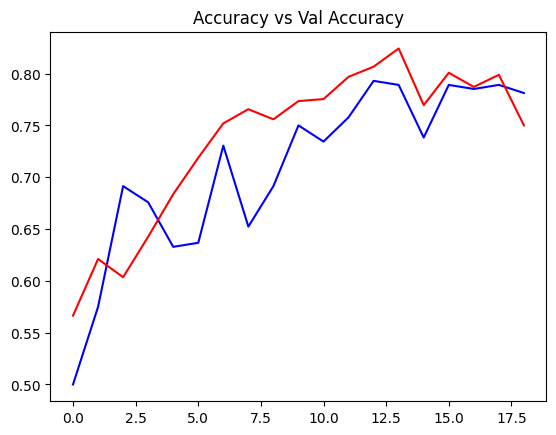

In [25]:
plt.plot(h['accuracy'], c = 'blue')
plt.plot(h['val_accuracy'], c = 'red')
plt.title('Accuracy vs Val Accuracy')

plt.show()

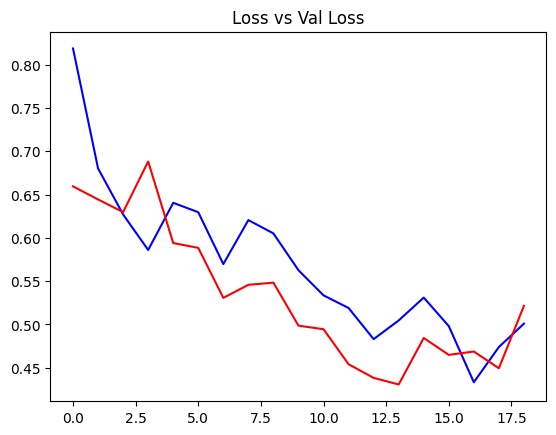

In [26]:
plt.plot(h['loss'], c = 'blue')
plt.plot(h['val_loss'], c = 'red')
plt.title('Loss vs Val Loss')

plt.show()

# Model Accuracy by Loading Best Model

In [27]:
# Model Accuracy
from keras.models import load_model

model = load_model('/content/bestmodel.h5')

In [28]:
# here the test data is passed to check the model accuracy
acc = model.evaluate_generator(test_data)[1]

print(f'Model Accuracy: {acc*100} %')

Model Accuracy: 83.14606547355652 %


# Random Testing on Image

In [29]:
from keras.preprocessing.image import load_img, img_to_array

In [30]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

In [35]:
# known cancer Image
path = '/content/Brain Tumor Data Set/Brain Tumor/Cancer (1018).jpg'

img = load_img(path,target_size = (224,224) ) # preprocessing

input_arr = img_to_array(img)/255 # converting to array
# dividing by 255 to normalize image

input_arr.shape

# expanding dimensions so that we can feed it to the model
input_arr = np.expand_dims(input_arr, axis = 0)

# make predictions using trained model
pred = model.predict(input_arr)

# get the class with maximum probability
pred_class = np.argmax(pred, axis=-1)

pred_class[0]

1/1 [==============================] - 0s 22ms/step


0